In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

% matplotlib inline

In [2]:
def load_data():
    X, Y = datasets.load_iris(return_X_y=True)
    X = StandardScaler().fit_transform(X)
    X = X[:, :2]
    return train_test_split(X, Y, test_size=0.2)

In [133]:
x_train, x_test, y_train, y_test = load_data()

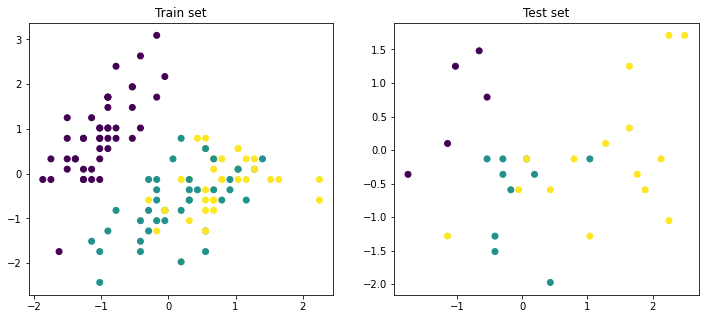

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
ax1.set_title("Train set")

ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax2.set_title("Test set")

plt.show()

In [158]:
def KNN(x_input, x_train, y_train, k=1):
    """
    x_input: NxM
    x_train: XxM
    y_train: Xx1

    """

    # calc distance
    pair_distance = np.zeros((x_input.shape[0], x_train.shape[0]))  # NxX
    for i, ith_points in enumerate(x_input):
        pair_distance[i, :] = np.linalg.norm(
            ith_points - x_train, axis=1, keepdims=True).T

    # sort and select closest K points
    sorted_idx = np.argsort(pair_distance, axis=1)[:, :k]  # shape NxK

    batch_rs = np.zeros((x_input.shape[0], 1), dtype=np.int8)  # shape Nx1
    for batch_idx, batch in enumerate(sorted_idx):
        batch_rs[batch_idx, :] = np.argmax(np.bincount(y_train[batch]))

    return batch_rs

In [67]:
# X, Y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, 
#                                     n_redundant=0, n_classes=3, n_clusters_per_class=1,
#                                    class_sep=1.0, random_state=44)

In [159]:
y_pred = KNN(x_test, x_train, y_train, k=3)

0.8666666666666667


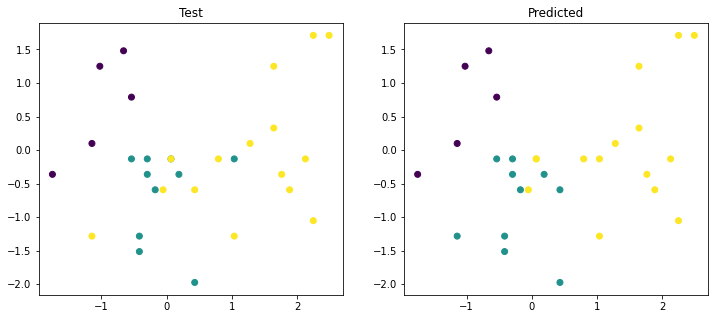

In [160]:
print(accuracy_score(y_pred, y_test))

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax1.set_title("Test")

ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)
ax2.set_title("Predicted")

plt.show()

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)
accuracy_score(y_pred2, y_test)

0.8